<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/Computer_Vision_MNIST_practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [81]:
!pip install torchmetrics

In [82]:
from torchmetrics import Accuracy

In [83]:
train_data = datasets.FashionMNIST(
    root= "data",
    download= True,
    transform= ToTensor(),
    target_transform= None,
    train= True
)

test_data = datasets.FashionMNIST(
    root= "data",
    download= True,
    transform= ToTensor(),
    target_transform= None,
    train= False
)
len(train_data), len(test_data)

(60000, 10000)

In [84]:
image, label = train_data[0]


In [85]:
class_names = train_data.classes
class_names[0]

'T-shirt/top'

In [86]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [87]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

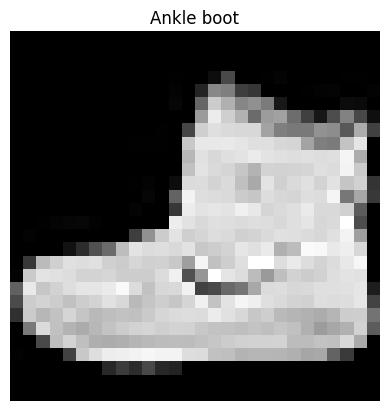

In [88]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.title(class_names[label])

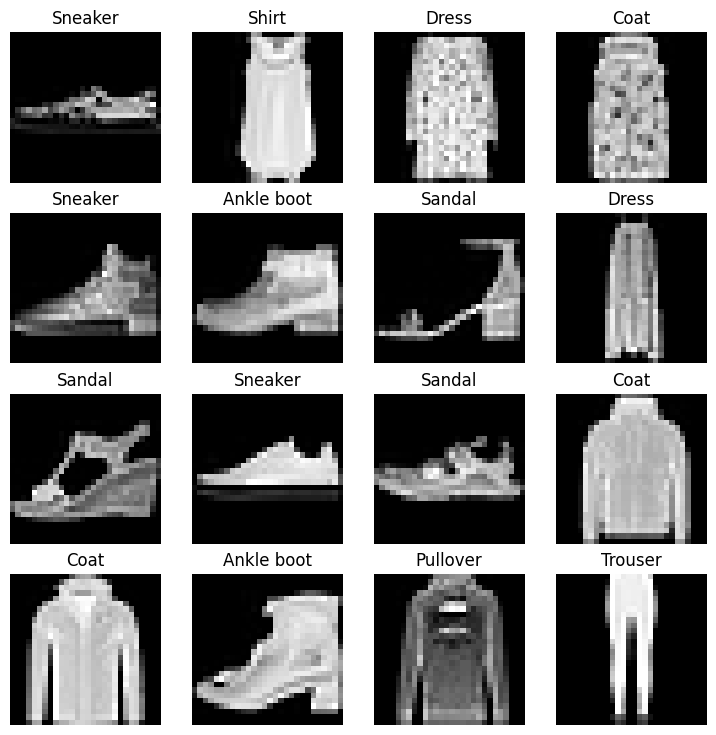

In [89]:
row, col = 4,4
fig = plt.figure(figsize=(9,9))
for i in range(1, row*col + 1):
  rand_int=torch.randint(0, len(train_data), size=[1]).item()
  img, lab = train_data[rand_int]
  fig.add_subplot(row,col, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(class_names[lab])

In [90]:
train_data_loader = DataLoader(
    dataset= train_data,
    batch_size=32,
    shuffle= True
)

test_data_loader = DataLoader(
    dataset= test_data,
    batch_size=32,
    shuffle= False
)
len(train_data_loader), len(test_data_loader)

(1875, 313)

In [112]:
class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape, hidden_units, out_shape):
    super().__init__()
    self.Layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=out_shape)
    )

  def forward(self, X):
    return self.Layer_stack(X)

model_0 = FashionMNISTV0(input_shape=784, hidden_units= 10, out_shape=10)

In [113]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task= 'multiclass', num_classes=10)

In [114]:
def training_step(model, loss_fn, accuracy_fn, optimizer, dataloader):
  train_loss, train_acc = 0,0
  for X, y in dataloader:
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_pred.argmax(dim=1), y)
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc


In [115]:
def testing_step(model, loss_fn, accuracy_fn, dataloader):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X,y in dataloader:
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      acc = accuracy_fn(y_pred.argmax(dim=1), y)
      test_loss += loss
      test_acc += acc
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc



In [116]:
from timeit import default_timer as timer
from tqdm import tqdm

start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_loss, train_acc =  training_step(model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer, dataloader= train_data_loader)
  test_loss, test_acc =  testing_step(model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn, dataloader= test_data_loader)

  print(f"Epoch: {epoch} | Training Loss: {train_loss: .4f}, Training Accuracy: {train_acc*100: .4f} | Testing Loss: {test_loss: .4f}, Testing Accuracy: {test_acc*100: .4f}")

end = timer()

print(f"total time is {end-start}")

 33%|███▎      | 1/3 [00:14<00:28, 14.49s/it]

Epoch: 0 | Training Loss:  0.5895, Training Accuracy:  79.1633 | Testing Loss:  0.5373, Testing Accuracy:  81.7592


 67%|██████▋   | 2/3 [00:28<00:14, 14.45s/it]

Epoch: 1 | Training Loss:  0.4761, Training Accuracy:  83.1900 | Testing Loss:  0.5004, Testing Accuracy:  82.4880


100%|██████████| 3/3 [00:43<00:00, 14.41s/it]

Epoch: 2 | Training Loss:  0.4546, Training Accuracy:  84.1567 | Testing Loss:  0.4902, Testing Accuracy:  82.4980
total time is 43.228864140999576


In [118]:
def eval_model(model, loss_fn, accuracy_fn, dataloader):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X,y in dataloader:
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      acc = accuracy_fn(y_pred.argmax(dim=1), y)
      test_loss += loss
      test_acc += acc
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return {"Model Name": model.__class__.__name__, "Training Loss": test_loss.item(), "Testing Accuracy": test_acc*100}

In [119]:
eval_model(model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn, dataloader= test_data_loader)

{'Model Name': 'FashionMNISTV0',
 'Training Loss': 0.4901570677757263,
 'Testing Accuracy': tensor(82.4980)}